<a href="https://colab.research.google.com/github/Greeshma72/Mushroom-Classification/blob/main/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Selection and Preprocessing**

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import itertools
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Mounting drive and printing head of the dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/MyDrive")
df= pd.read_csv('secondary_data.csv', on_bad_lines='skip')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,class;cap-diameter;cap-shape;cap-surface;cap-color;does-bruise-or-bleed;gill-attachment;gill-spacing;gill-color;stem-height;stem-width;stem-root;stem-surface;stem-color;veil-type;veil-color;has-ring;ring-type;spore-print-color;habitat;season
0,p;15.26;x;g;o;f;e;;w;16.95;17.09;s;y;w;u;w;t;g...
1,p;16.6;x;g;o;f;e;;w;17.99;18.19;s;y;w;u;w;t;g;...
2,p;14.07;x;g;o;f;e;;w;17.8;17.74;s;y;w;u;w;t;g;...
3,p;14.17;f;h;e;f;e;;w;15.77;15.98;s;y;w;u;w;t;p...
4,p;14.64;x;h;o;f;e;;w;16.53;17.2;s;y;w;u;w;t;p;...


Splitting the columns

In [ ]:
# Step 1: Split the single column into multiple columns using the semicolon delimiter
df_split = df['class;cap-diameter;cap-shape;cap-surface;cap-color;does-bruise-or-bleed;gill-attachment;gill-spacing;gill-color;stem-height;stem-width;stem-root;stem-surface;stem-color;veil-type;veil-color;has-ring;ring-type;spore-print-color;habitat;season'].str.split(';', expand=True)

# Step 2: Rename the columns based on the header information
df_split.columns = [
    'class', 'cap_diameter', 'cap_shape', 'cap_surface', 'cap_color',
    'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
    'stem_height', 'stem_width', 'stem_root', 'stem_surface', 'stem_color',
    'veil_type', 'veil_color', 'has_ring', 'ring_type', 'spore_print_color',
    'habitat', 'season'
]

# Step 3: Strip leading and trailing whitespaces
df_cleaned = df_split.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Step 4: Convert appropriate columns to numerical data types
# Assume 'cap_diameter', 'stem_height', and 'stem_width' are numerical
df_cleaned['cap_diameter'] = pd.to_numeric(df_cleaned['cap_diameter'], errors='coerce')
df_cleaned['stem_height'] = pd.to_numeric(df_cleaned['stem_height'], errors='coerce')
df_cleaned['stem_width'] = pd.to_numeric(df_cleaned['stem_width'], errors='coerce')
print(df_cleaned.head())

  class  cap_diameter cap_shape cap_surface cap_color does_bruise_or_bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill_attachment gill_spacing gill_color  stem_height  ...  stem_root  \
0               e                       w        16.95  ...          s   
1               e                       w        17.99  ...          s   
2               e                       w        17.80  ...          s   
3               e                       w        15.77  ...          s   
4               e                       w        16.53  ...          s   

  stem_surface stem_color veil_type veil_color has_ring ring_type  \
0            y   

In [ ]:
df_cleaned['season'].unique()

array(['w', 'u', 'a', 's'], dtype=object)

In [ ]:
df_cleaned.shape

(61069, 21)

Checking for the null values

In [ ]:
df_cleaned.isnull().sum()

class                   0
cap_diameter            0
cap_shape               0
cap_surface             0
cap_color               0
does_bruise_or_bleed    0
gill_attachment         0
gill_spacing            0
gill_color              0
stem_height             0
stem_width              0
stem_root               0
stem_surface            0
stem_color              0
veil_type               0
veil_color              0
has_ring                0
ring_type               0
spore_print_color       0
habitat                 0
season                  0
dtype: int64

Encoding the Categorical Variables

In [ ]:
labelencoder=LabelEncoder()
for column in df_cleaned.columns:
    df_cleaned[column] = labelencoder.fit_transform(df_cleaned[column])

In [ ]:
df_cleaned.head()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,1,1481,6,3,6,0,3,0,10,1577,...,5,8,11,1,5,1,3,0,0,3
1,1,1614,6,3,6,0,3,0,10,1681,...,5,8,11,1,5,1,3,0,0,2
2,1,1362,6,3,6,0,3,0,10,1662,...,5,8,11,1,5,1,3,0,0,3
3,1,1372,2,4,1,0,3,0,10,1463,...,5,8,11,1,5,1,6,0,0,3
4,1,1419,6,4,6,0,3,0,10,1537,...,5,8,11,1,5,1,6,0,0,3


In [ ]:
df_cleaned.describe()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,...,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,0.554913,612.584470,4.041641,4.984100,6.144541,0.173410,2.948141,0.832370,7.338502,547.482143,...,0.479769,2.060964,8.429072,0.052023,0.563396,0.248555,2.369074,0.380439,0.623721,1.053300
std,0.496979,426.326506,2.138630,3.966123,3.171077,0.378605,2.383064,0.860638,3.186426,320.006707,...,1.301808,2.934895,3.218516,0.222075,1.558891,0.432179,1.544033,1.278864,1.265880,1.100575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,303.000000,2.000000,1.000000,5.000000,0.000000,1.000000,0.000000,5.000000,354.000000,...,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,541.000000,5.000000,4.000000,5.000000,0.000000,2.000000,1.000000,7.000000,485.000000,...,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
75%,1.000000,809.000000,6.000000,9.000000,10.000000,0.000000,5.000000,1.000000,10.000000,664.000000,...,0.000000,4.000000,11.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000
max,1.000000,2570.000000,6.000000,11.000000,11.000000,1.000000,7.000000,3.000000,11.000000,2225.000000,...,5.000000,8.000000,12.000000,1.000000,6.000000,1.000000,8.000000,7.000000,7.000000,3.000000


In [ ]:
X=df_cleaned.drop(['class'], axis=1)
Y=df_cleaned['class']

**Exploratory Data Analysis (EDA)**

Plotting the Graph of Mushrooms to Know no.of poisonous/edible mushrooms


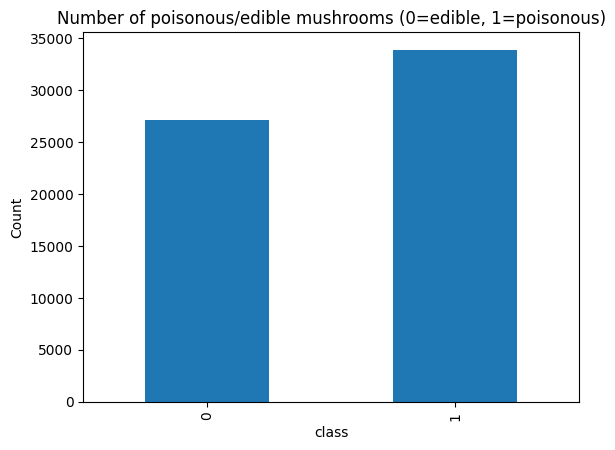

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
pd.Series(df_cleaned['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

Visualizing the distribution of each feature using histograms

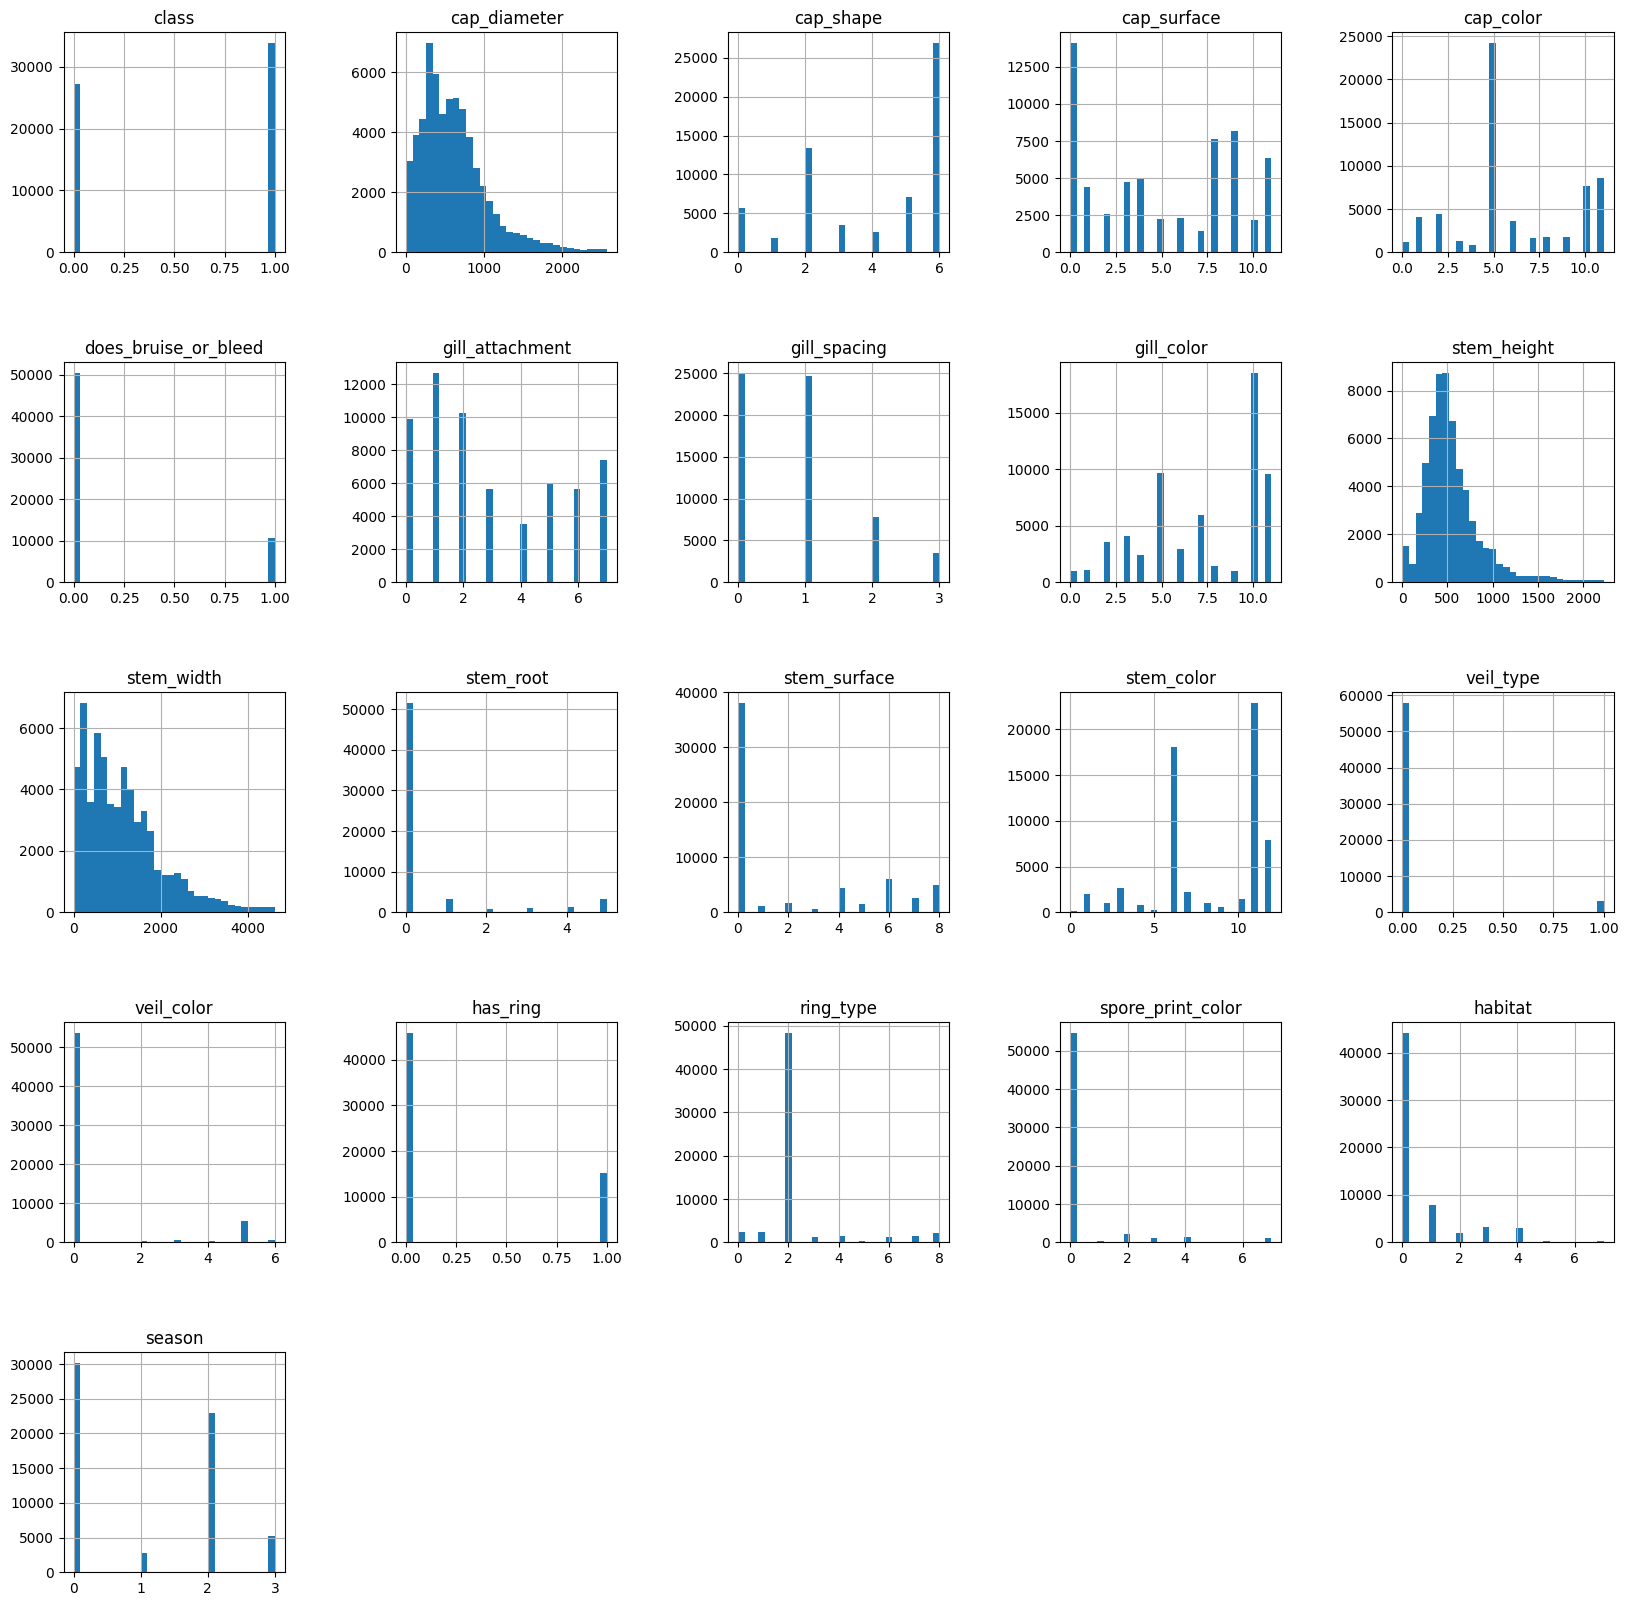

In [ ]:
# Histograms
def plot_histograms(df, cols, width, height, hspace, wspace):
  # Calculate the number of rows needed based on the number of columns and columns per row
    num_rows = (len(cols) + 4) // 5  # Round up to the nearest integer
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(hspace=hspace, wspace=wspace)
    for i, col in enumerate(cols):
        ax = fig.add_subplot(num_rows, 5, i+1)
        df[col].hist(bins=30, ax=ax)
        ax.set_title(col)
    plt.show()

# Plot settings
cols = df_cleaned.columns  # Select the columns you want to plot
width = 20
height = 20
hspace = 0.5
wspace = 0.5

# Plot histograms
plot_histograms(df_cleaned, cols, width, height, hspace, wspace)

Displaying Heat Map

In [ ]:
# Calculate correlation matrix
corr_matrix = df_cleaned.corr()

# Fill any NaN values with zero if necessary
corr_matrix = corr_matrix.fillna(0)

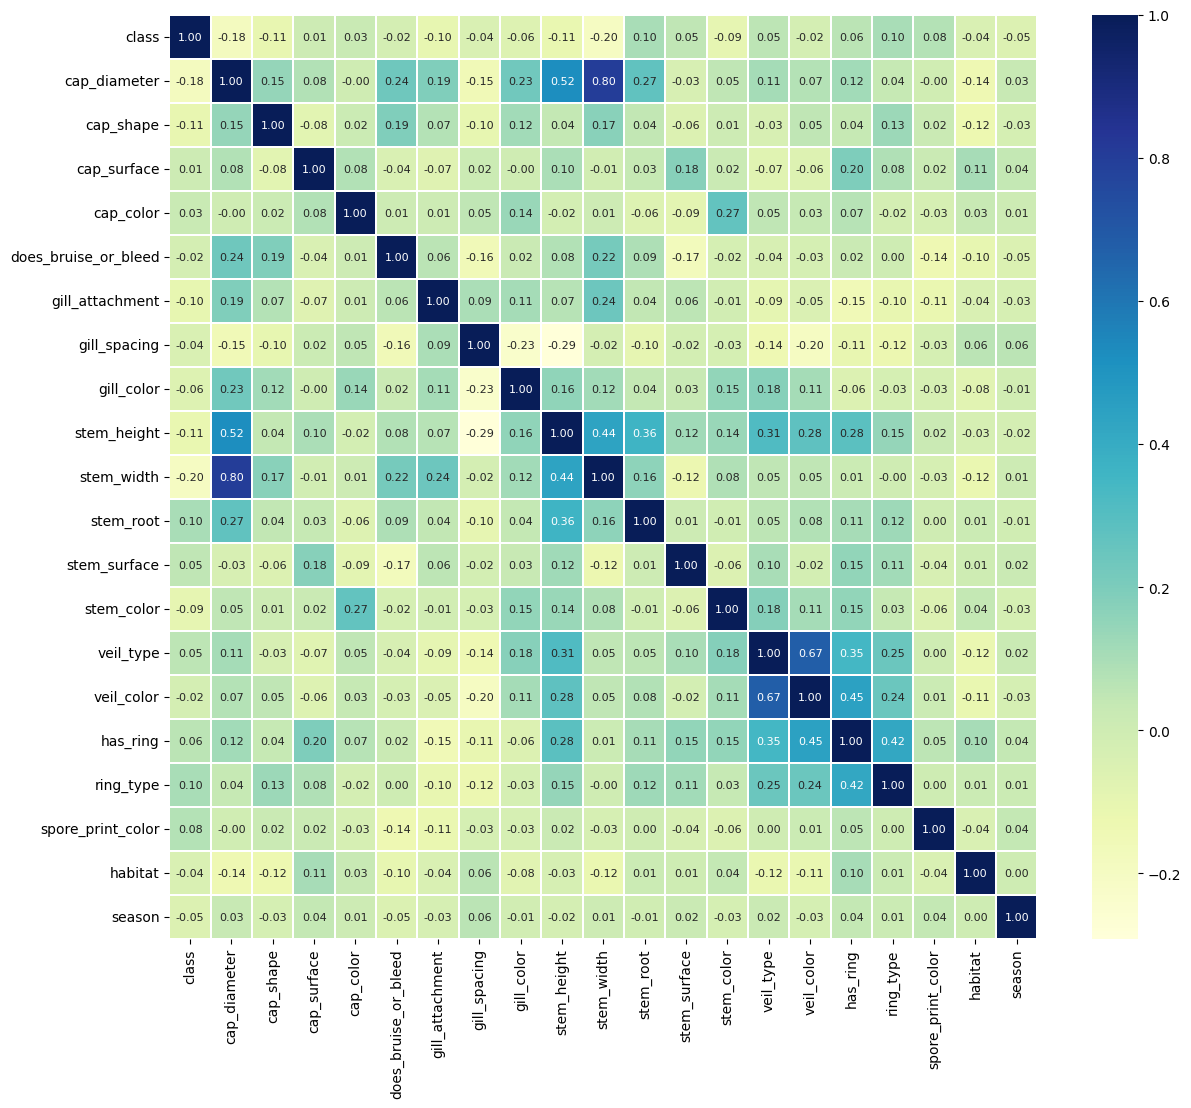

In [ ]:
import seaborn as sns
# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, linewidths=.1, cmap="YlGnBu", annot=True, annot_kws={"size": 8}, fmt=".2f")
plt.yticks(rotation=0)

# Display the plot
plt.show()

Outlier Analysis

In [ ]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df_cleaned.select_dtypes(include=[float, int]))

# Identify outliers
outliers = (abs(z_scores) > 3).any(axis=1)
outliers_summary = df_cleaned[outliers]
outliers_summary.head()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,1,1481,6,3,6,0,3,0,10,1577,...,5,8,11,1,5,1,3,0,0,3
1,1,1614,6,3,6,0,3,0,10,1681,...,5,8,11,1,5,1,3,0,0,2
2,1,1362,6,3,6,0,3,0,10,1662,...,5,8,11,1,5,1,3,0,0,3
3,1,1372,2,4,1,0,3,0,10,1463,...,5,8,11,1,5,1,6,0,0,3
4,1,1419,6,4,6,0,3,0,10,1537,...,5,8,11,1,5,1,6,0,0,3


In [ ]:
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))
outliers_iqr_summary = df_cleaned[outliers_iqr.any(axis=1)]

outliers_iqr_summary.head()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,1,1481,6,3,6,0,3,0,10,1577,...,5,8,11,1,5,1,3,0,0,3
1,1,1614,6,3,6,0,3,0,10,1681,...,5,8,11,1,5,1,3,0,0,2
2,1,1362,6,3,6,0,3,0,10,1662,...,5,8,11,1,5,1,3,0,0,3
3,1,1372,2,4,1,0,3,0,10,1463,...,5,8,11,1,5,1,6,0,0,3
4,1,1419,6,4,6,0,3,0,10,1537,...,5,8,11,1,5,1,6,0,0,3


In [ ]:
# Get the dataset after removing outliers
df_no_outliers = df_cleaned[~outliers_iqr.any(axis=1)]

print("Original DataFrame:")
print(df_cleaned)
print(df_cleaned.shape)
print("\nOutliers:")
print(outliers_iqr_summary)

print("\nDataFrame after removing outliers:")
print(df_no_outliers)

Original DataFrame:
       class  cap_diameter  cap_shape  cap_surface  cap_color  \
0          1          1481          6            3          6   
1          1          1614          6            3          6   
2          1          1362          6            3          6   
3          1          1372          2            4          1   
4          1          1419          6            4          6   
...      ...           ...        ...          ...        ...   
61064      1            73          5            8         11   
61065      1            82          2            8         11   
61066      1            82          5            8         11   
61067      1            79          2            8         11   
61068      1            72          5            8         11   

       does_bruise_or_bleed  gill_attachment  gill_spacing  gill_color  \
0                         0                3             0          10   
1                         0                3       

In [ ]:
df_no_outliers.isnull().sum()

class                   0
cap_diameter            0
cap_shape               0
cap_surface             0
cap_color               0
does_bruise_or_bleed    0
gill_attachment         0
gill_spacing            0
gill_color              0
stem_height             0
stem_width              0
stem_root               0
stem_surface            0
stem_color              0
veil_type               0
veil_color              0
has_ring                0
ring_type               0
spore_print_color       0
habitat                 0
season                  0
dtype: int64

**Feature Selection and Engineering**

In [ ]:
X=df_no_outliers.drop(['class'], axis=1)
Y=df_no_outliers['class']

In [ ]:
from scipy.stats import chi2_contingency
# Chi-Square Test
chi2_results = {}
for feature in X.columns:
    contingency_table = pd.crosstab(X[feature], Y)
    chi2, p, dof, ex = chi2_contingency(contingency_table, correction=False)
    chi2_results[feature] = {'Chi-Square': chi2, 'P-Value': p}

chi2_df = pd.DataFrame(chi2_results).transpose().reset_index()
chi2_df.columns = ['Feature', 'Chi-Square', 'P-Value']
chi2_df = chi2_df.sort_values(by='Chi-Square', ascending=False)
print("\nChi-Square Test Results:\n", chi2_df)


Chi-Square Test Results:
                  Feature   Chi-Square        P-Value
9             stem_width  5229.058468  1.712742e-147
12            stem_color  3571.256236   0.000000e+00
7             gill_color  3484.612152   0.000000e+00
0           cap_diameter  3171.853025  2.704725e-132
3              cap_color  2703.887747   0.000000e+00
8            stem_height  2179.813689   2.408339e-86
11          stem_surface  1777.562530   0.000000e+00
2            cap_surface  1675.209188   0.000000e+00
5        gill_attachment  1314.856449  6.584728e-281
1              cap_shape   735.919968  1.071374e-155
6           gill_spacing   448.574179   3.920618e-98
19                season   329.172376   4.820497e-71
18               habitat   125.925200   4.525746e-28
4   does_bruise_or_bleed     0.000000   1.000000e+00
13             veil_type     0.000000   1.000000e+00
14            veil_color     0.000000   1.000000e+00
15              has_ring     0.000000   1.000000e+00
16             ring

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# X and Y are your features and target variable respectively
clf = RandomForestClassifier()
clf.fit(X, Y)

RandomForestClassifier()

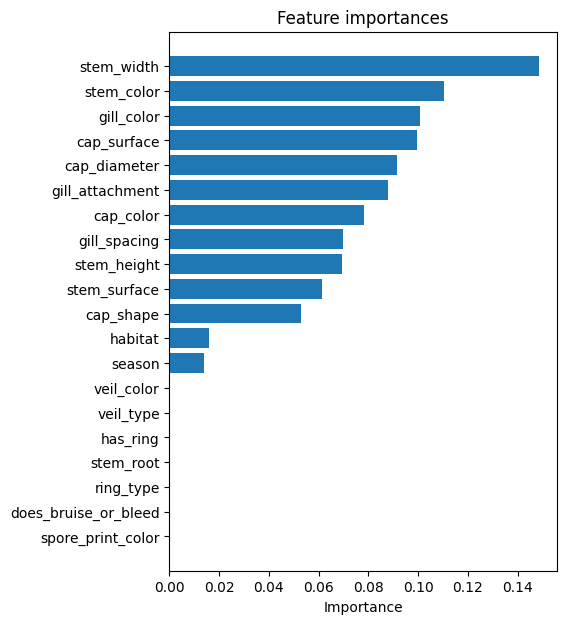

In [ ]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

Removing Unnecessary columns

In [ ]:
df1= df_no_outliers.copy()
df1.drop(columns=['veil_type', 'veil_color', 'stem_root', 'has_ring', 'ring_type', 'does_bruise_or_bleed', 'spore_print_color'], axis=1, inplace=True)
print(df1.head())
print(df1.shape)

      class  cap_diameter  cap_shape  cap_surface  cap_color  gill_attachment  \
4236      0           225          5           11          5                2   
4237      0           196          5           11          5                1   
4238      0           224          2           11          5                1   
4246      0           205          2           11          5                1   
4248      0           238          5           11          5                2   

      gill_spacing  gill_color  stem_height  stem_width  stem_surface  \
4236             2           7          518         272             4   
4237             2           7          574         283             4   
4238             2           7          643         356             4   
4246             2           7          537         277             4   
4248             2           7          758         316             4   

      stem_color  habitat  season  
4236           6        2       2  
42

**Model Selection and Training**

In [ ]:
x=df1.drop(['class'], axis=1)
y=df1['class']

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Gradient Boosting Regression - MSE: 0.035402685218850545, R2: 0.8582848028870911


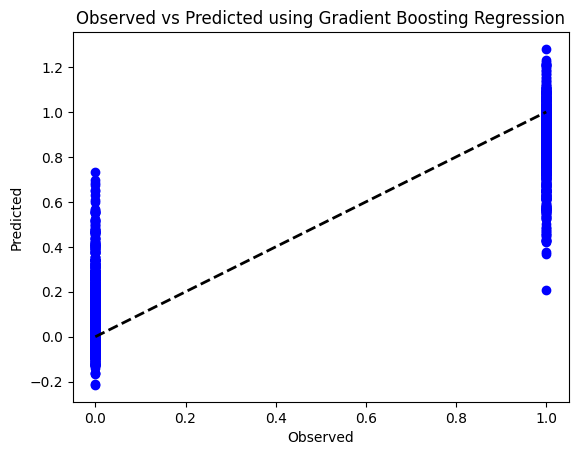

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100),
}

# Fit models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    results[name] = {"MSE": mse, "R2": r2}

# Print results
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']}, R2: {metrics['R2']}")

# Example plot for Linear Regression (you can plot for other models in a similar way)
plt.figure()
plt.scatter(Y_test, models["Gradient Boosting Regression"].predict(X_test), color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted using Gradient Boosting Regression')
plt.savefig('linear_regression_plot.png')
plt.show()

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2245
           1       1.00      1.00      1.00      2174

    accuracy                           1.00      4419
   macro avg       1.00      1.00      1.00      4419
weighted avg       1.00      1.00      1.00      4419



Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2245
           1       1.00      1.00      1.00      2174

    accuracy                           1.00      4419
   macro avg       1.00      1.00      1.00      4419
weighted avg       1.00      1.00      1.00      4419



Naive Bayes:
              precision    recall  f1-score   support

           0       0.67      0.70      0.69      2245
           1       0.68      0.65      0.66      2174

    accuracy                           0.68      4419
   macro avg       0.68      0.68      0.68      4419
weighted avg       0.68    

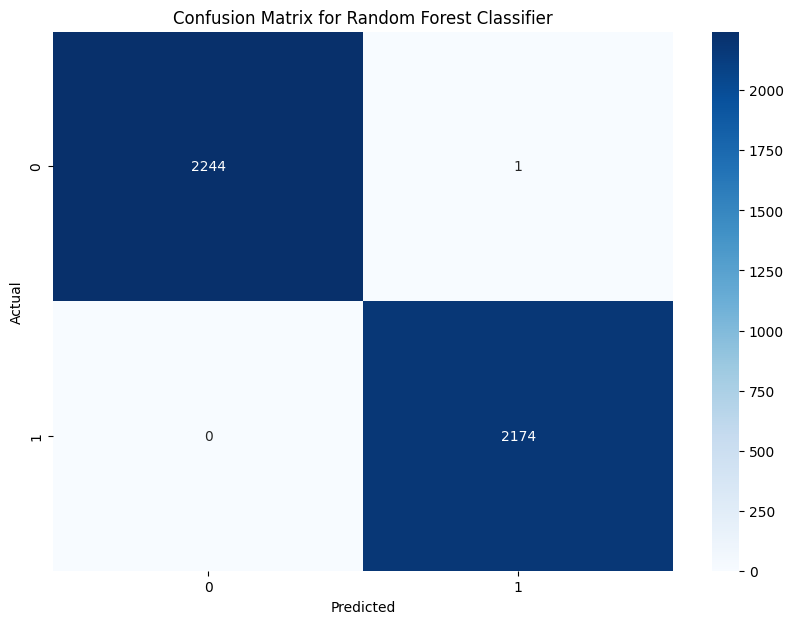

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode the target variable 'y' using LabelEncoder
le = LabelEncoder()  # Create a LabelEncoder object
z = le.fit_transform(y)  # Fit and transform the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, z, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators= 100),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Fit models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f"{name}:")
    print(classification_report(y_test, predictions))
    print("\n")

# Print accuracy results
print("Accuracy of different models:")
for name, score in results.items():
    print(f"{name}: {score}")

# Plot confusion matrix for one of the models (e.g., Random Forest)
conf_matrix = confusion_matrix(y_test, models["Random Forest"].predict(X_test))
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.savefig('confusion_matrix_rf.png')
plt.show()

Naive Bayes

**Model Evaluation and Optimization**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize Naive Bayes models
gnb = GaussianNB()

# Train models
gnb.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test)

# Evaluate models
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))

# Print Classification Reports
print("\nClassification Report for GaussianNB:\n", classification_report(y_test, y_pred_gnb))

GaussianNB Accuracy: 0.6761710794297352

Classification Report for GaussianNB:
               precision    recall  f1-score   support

           0       0.67      0.70      0.69      2245
           1       0.68      0.65      0.66      2174

    accuracy                           0.68      4419
   macro avg       0.68      0.68      0.68      4419
weighted avg       0.68      0.68      0.68      4419



In [ ]:
# Example for GaussianNB (not many parameters to tweak, but just to show the process)
param_grid_gnb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
}

gs_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid_gnb, cv=5, n_jobs=-1, scoring='accuracy')
gs_gnb.fit(X_train, y_train)

print(f"Best GaussianNB Parameters: {gs_gnb.best_params_}")
print(f"Best GaussianNB Accuracy: {gs_gnb.best_score_}")

# Re-evaluate with best estimator
y_pred_best_gnb = gs_gnb.best_estimator_.predict(X_test)
print("Best GaussianNB Test Accuracy:", accuracy_score(y_test, y_pred_best_gnb))

Best GaussianNB Parameters: {'var_smoothing': 1e-09}
Best GaussianNB Accuracy: 0.6631776502898895
Best GaussianNB Test Accuracy: 0.6761710794297352


In [ ]:
# Handle potential negative values before log transformation
X_train_non_negative = np.where(X_train < 0, 0, X_train)
X_test_non_negative = np.where(X_test < 0, 0, X_test)

X_train_log = np.log1p(X_train_non_negative)
X_test_log = np.log1p(X_test_non_negative)

# Train and evaluate GaussianNB again
gnb.fit(X_train_log, y_train)
y_pred_log = gnb.predict(X_test_log)

print("GaussianNB Accuracy after Log Transformation:", accuracy_score(y_test, y_pred_log))

GaussianNB Accuracy after Log Transformation: 0.6836388323150034


In [ ]:
from sklearn.ensemble import VotingClassifier

# Combine different Naive Bayes variants in a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('gnb', gnb)
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.6761710794297352


Using cross-validation techniques (e.g., k-fold cross-validation) to assess model
performance and stability.

Desicion Tree

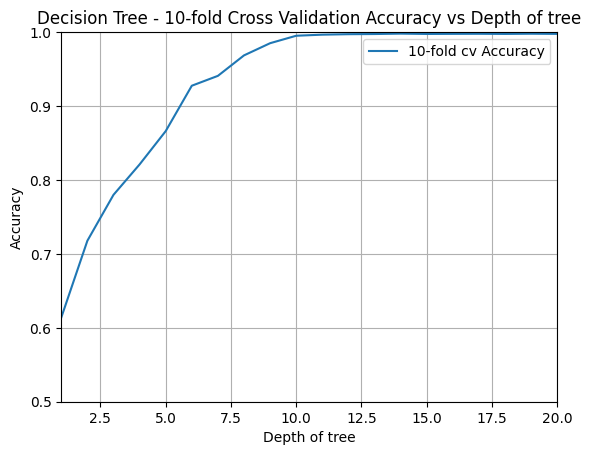

In [ ]:
from sklearn.model_selection import KFold

# Define the function for computing CV accuracy
def computeCVAccuracy(X, y, folds):
    foldAcc = []
    depth = list(range(1, 21))  # Depth from 1 to 20
    for i in depth:
        accuracy = []  # Reset accuracy list for each depth
        kf = KFold(n_splits=folds, shuffle=True, random_state=42)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
            clf = DecisionTreeClassifier(max_depth=i).fit(X_train, Y_train)
            score = clf.score(X_test, Y_test)
            accuracy.append(score)
        foldAcc.append(np.mean(accuracy))  # Average accuracy over folds for current depth
    return foldAcc

# Compute the cross-validation accuracy
cvAccuracy = computeCVAccuracy(X, Y, folds=10)

# Create a DataFrame from the accuracy list
df1 = pd.DataFrame(cvAccuracy, columns=['10-fold cv Accuracy'])

# Plot the results
df1.index = range(1, 21)  # Set index to represent tree depths
df1.plot()
plt.title("Decision Tree - 10-fold Cross Validation Accuracy vs Depth of tree")
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])  # Adjust the y-axis limit if necessary
plt.xlim([1, 20])   # Depth range from 1 to 20
plt.grid(True)
plt.show()


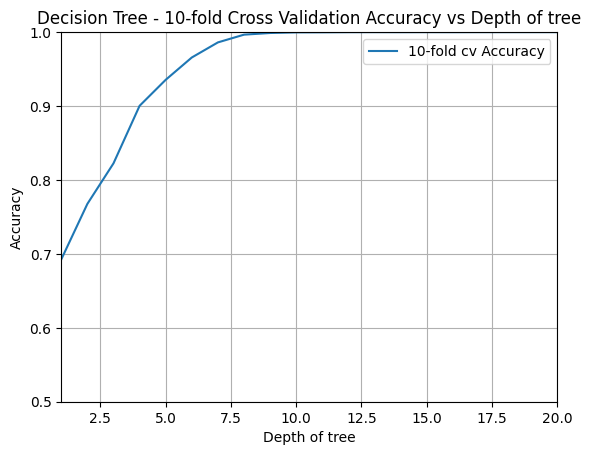

In [ ]:
from sklearn.model_selection import KFold

# Define the function for computing CV accuracy
def computeCVAccuracy(X, y, folds):
    foldAcc = []
    depth = list(range(1, 21))  # Depth from 1 to 20
    for i in depth:
        accuracy = []  # Reset accuracy list for each depth
        kf = KFold(n_splits=folds, shuffle=True, random_state=42)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
            clf = RandomForestClassifier(max_depth=i).fit(X_train, Y_train)
            score = clf.score(X_test, Y_test)
            accuracy.append(score)
        foldAcc.append(np.mean(accuracy))  # Average accuracy over folds for current depth
    return foldAcc

# Compute the cross-validation accuracy
cvAccuracy = computeCVAccuracy(X, Y, folds=10)

# Create a DataFrame from the accuracy list
df1 = pd.DataFrame(cvAccuracy, columns=['10-fold cv Accuracy'])

# Plot the results
df1.index = range(1, 21)  # Set index to represent tree depths
df1.plot()
plt.title("Random Forest - 10-fold Cross Validation Accuracy vs Depth of tree")
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])  # Adjust the y-axis limit if necessary
plt.xlim([1, 20])   # Depth range from 1 to 20
plt.grid(True)
plt.show()

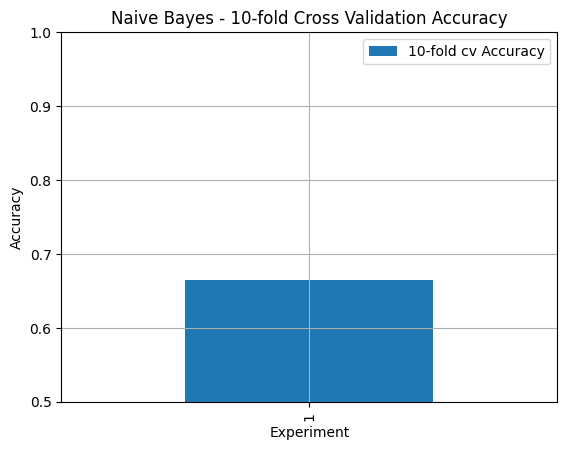

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# Define the function for computing CV accuracy
def computeCVAccuracy(X, y, folds):
    foldAcc = []
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = GaussianNB()
        model.fit(X_train, y_train)
        foldAcc.append(model.score(X_test, y_test))
    accuracy = np.mean(foldAcc)
    return accuracy

# Compute the cross-validation accuracy
cvAccuracy = computeCVAccuracy(X, Y, folds=10)

# Create a DataFrame from the accuracy list
df1 = pd.DataFrame([cvAccuracy], columns=['10-fold cv Accuracy'])

# Plot the results
df1.index = range(1, len(df1) + 1)  # Since there's only one value, index is just [1]
df1.plot(kind='bar')
plt.title("Naive Bayes - 10-fold Cross Validation Accuracy")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.xlabel("Experiment")
plt.grid(True)
plt.show()


Adjusting hyperparameters

Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2245
           1       0.86      0.94      0.90      2174

    accuracy                           0.89      4419
   macro avg       0.90      0.89      0.89      4419
weighted avg       0.90      0.89      0.89      4419



Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2245
           1       0.80      0.87      0.84      2174

    accuracy                           0.83      4419
   macro avg       0.83      0.83      0.83      4419
weighted avg       0.83      0.83      0.83      4419



Naive Bayes:
              precision    recall  f1-score   support

           0       0.67      0.70      0.69      2245
           1       0.68      0.65      0.66      2174

    accuracy                           0.68      4419
   macro avg       0.68      0.68      0.68      4419
weighted avg       0.68    

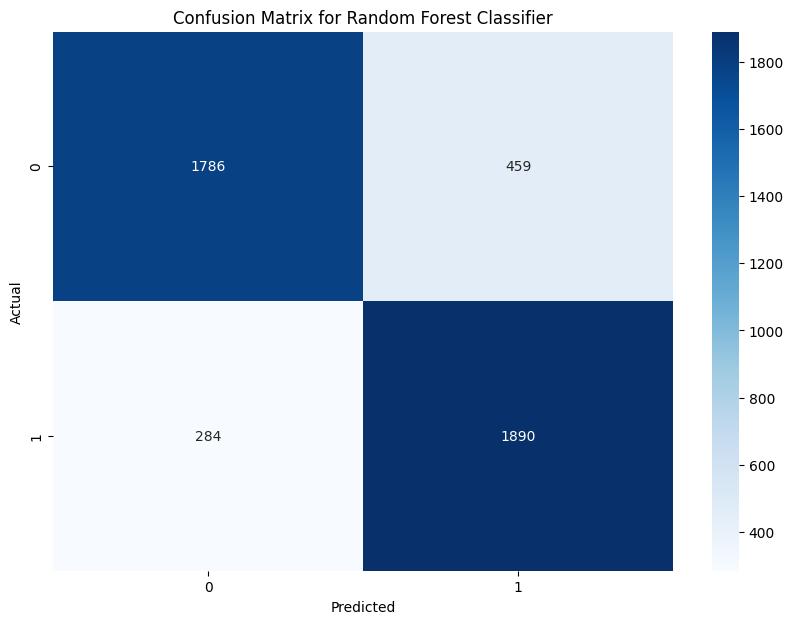

In [ ]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth= 6),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth= 3, min_samples_split= 2),
    "Naive Bayes": GaussianNB(var_smoothing= 6.579332246575682e-09),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Fit models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f"{name}:")
    print(classification_report(y_test, predictions))
    print("\n")

# Print accuracy results
print("Accuracy of different models:")
for name, score in results.items():
    print(f"{name}: {score}")

# Plot confusion matrix for one of the models (e.g., Random Forest)
conf_matrix = confusion_matrix(y_test, models["Random Forest"].predict(X_test))
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.savefig('confusion_matrix_rf.png')
plt.show()

**Interpretation and Visualization**

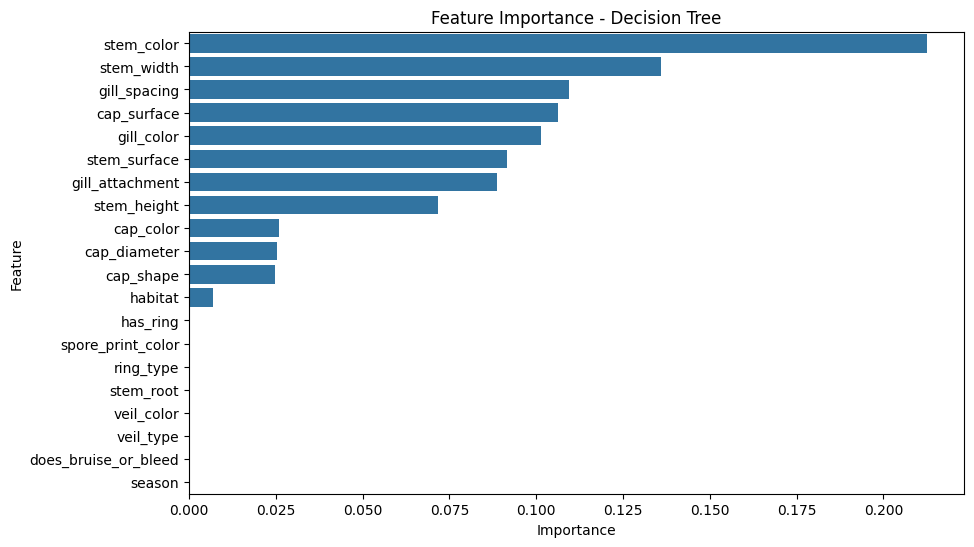

In [ ]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X, y)

# Get feature importance
feature_importance = model.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Decision Tree')
plt.show()


In [ ]:
from matplotlib.colors import ListedColormap

# Visualize decision boundaries for first two features (simplified example)
X_vis = X.iloc[:, [0, 1]].values
y_vis = y.values

model = DecisionTreeClassifier(max_depth=7)
model.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('orange', 'blue')))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', marker='o')
plt.title('Decision Tree Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

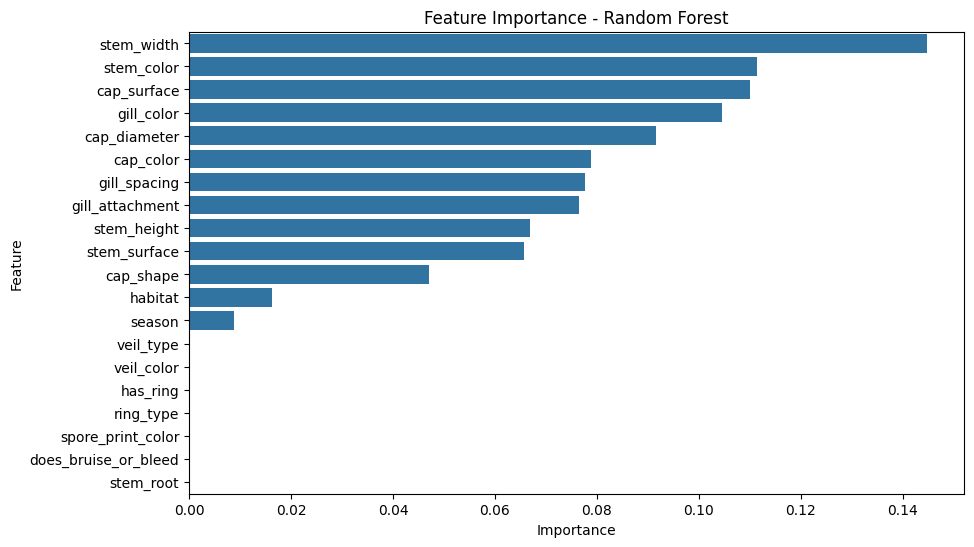

In [ ]:
model = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_split=2)
model.fit(X, y)

# Feature importance
feature_importance = model.feature_importances_
X_df = pd.DataFrame(X)
importance_df = pd.DataFrame({'Feature': X_df.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()


Feature Means per Class:
    cap_diameter  cap_shape  cap_surface  cap_color  does_bruise_or_bleed  \
0    514.415443   3.986834     4.602171   5.908193                   0.0   
1    409.581920   3.782068     4.591504   7.062016                   0.0   

   gill_attachment  gill_spacing  gill_color  stem_height  stem_width  \
0         3.030691      0.897162    7.692287   447.946268  954.422916   
1         2.688445      0.738850    7.992905   399.645227  731.045798   

   stem_root  stem_surface  stem_color  veil_type  veil_color  has_ring  \
0        0.0      1.980607    8.699582        0.0         0.0       0.0   
1        0.0      2.147254    8.741430        0.0         0.0       0.0   

   ring_type  spore_print_color   habitat    season  
0        2.0                0.0  0.235833  1.136643  
1        2.0                0.0  0.312753  0.946554  

Feature Variances per Class:
    cap_diameter  cap_shape  cap_surface  cap_color  does_bruise_or_bleed  \
0  83993.013157   4.970293    

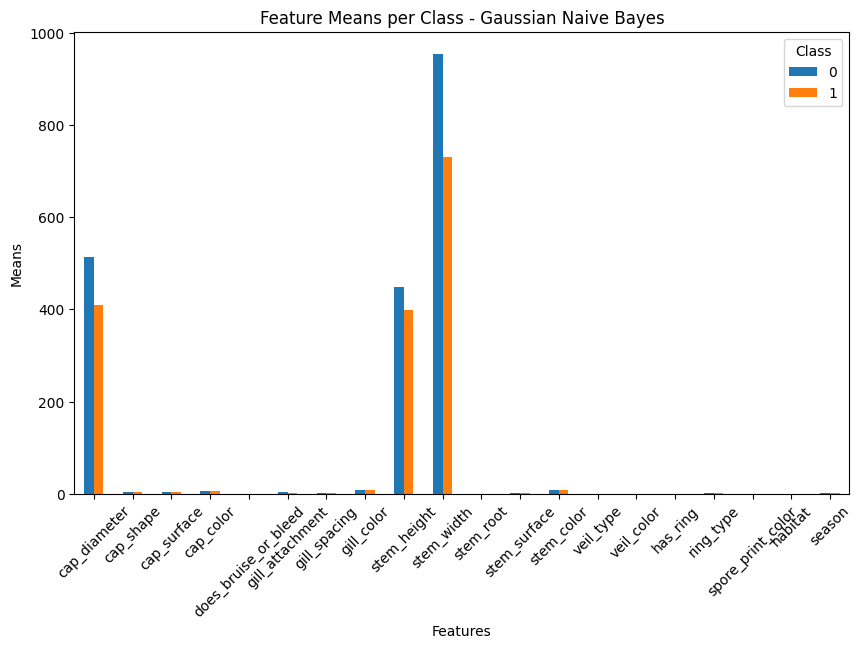

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(var_smoothing=6.579332246575682e-09)
model.fit(X, y)

# Means of each feature per class
means = model.theta_

# Variances of each feature per class
variances = model.var_

# Display means and variances
means_df = pd.DataFrame(means, columns=X_df.columns)
variances_df = pd.DataFrame(variances, columns=X_df.columns)

print("Feature Means per Class:\n", means_df)
print("\nFeature Variances per Class:\n", variances_df)

# Visualize means
means_df.T.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Means per Class - Gaussian Naive Bayes')
plt.xlabel('Features')
plt.ylabel('Means')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()


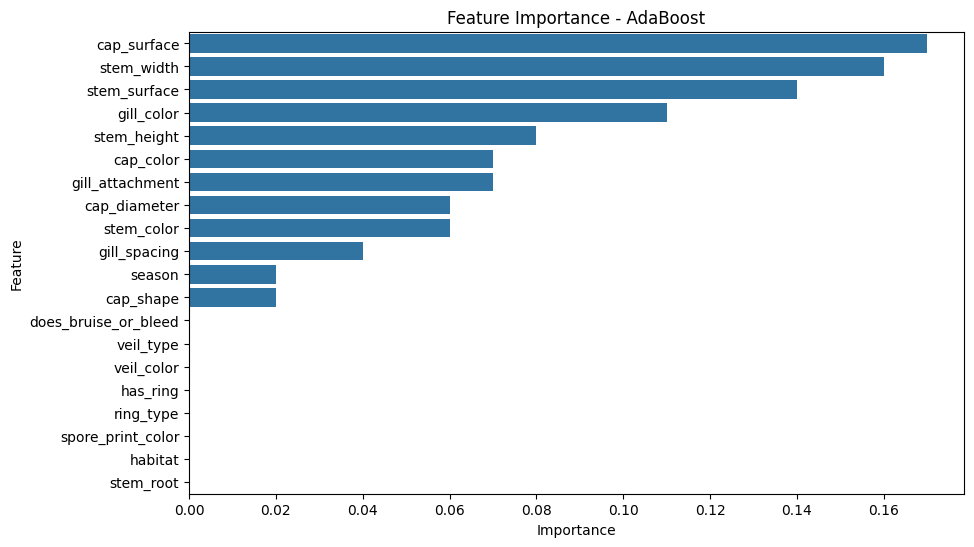

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Train the model
model = AdaBoostClassifier(n_estimators=100)
model.fit(X, y)

# Feature importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_df.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - AdaBoost')
plt.show()


Time-Series Analysis

In [ ]:
df_cleaned['season'].unique()

array([3, 2, 0, 1])

In [ ]:
# Convert season and class to categorical
df2= df_cleaned.copy()
df2['season'] = df2['season'].astype('category')
df2['class'] = df2['class'].astype('category')

In [ ]:
# Check unique values in 'season' and 'class' columns
print(df2['season'].unique())
print(df2['class'].unique())

# Convert 'season' to a categorical type if not already
df2['season'] = pd.Categorical(df2['season'])

# Group by 'season' and count the occurrences of each 'class'
season_class_counts = df2.groupby(['season', 'class']).size().unstack(fill_value=0)

# Display the grouped data
print(season_class_counts)


[3, 2, 0, 1]
Categories (4, int64): [0, 1, 2, 3]
[1, 0]
Categories (2, int64): [0, 1]
class       0      1
season              
0       12785  17392
1        1553   1174
2        9647  13251
3        3196   2071


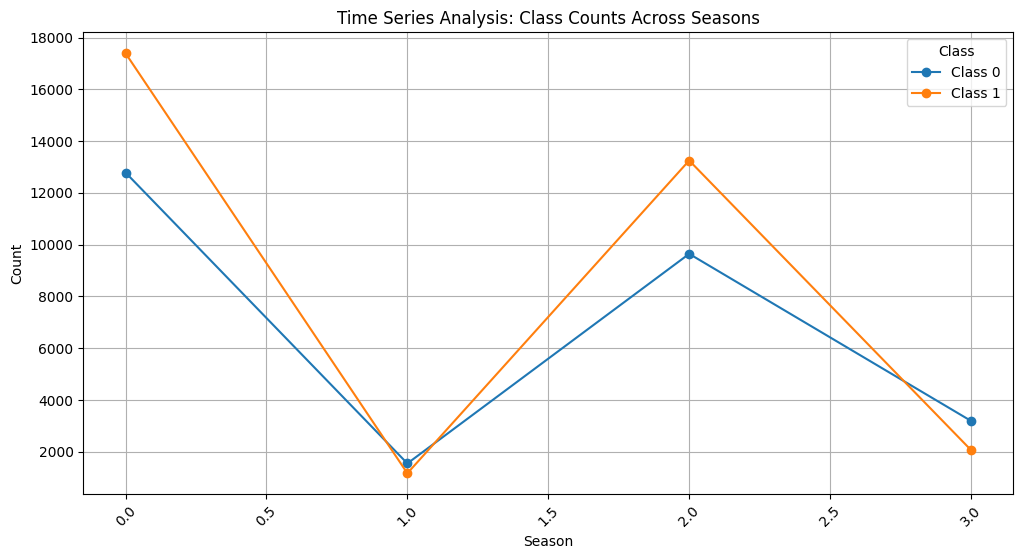

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(12, 6))

# Iterate through each class and plot its counts per season
for class_label in season_class_counts.columns:
    plt.plot(season_class_counts.index, season_class_counts[class_label], marker='o', label=f'Class {class_label}')

plt.title('Time Series Analysis: Class Counts Across Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Class')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
